In [22]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [226]:
from testing.leandro.preprocess_class import *
from testing.leandro.plots import *
from testing.leandro.filters import *
from testing.leandro.metrics import *

In [139]:
#datasets = ['Uzel2022', 'Skora2018', 'Nichols2017', 'Kato2015', 'Kaplan2020']

datasets = ['Uzel2022']

transform = MinMaxScaler(feature_range=(-1,1))
smooth_method = 'fft'
resample_dt = .1
norm_dim = 'neurons'

for ds in datasets:
    prep = PreprocessDataset(ds, transform, smooth_method, resample_dt, norm_dim)
    prep.preprocess_pipeline()

In [154]:
oneWorm = prep.data['worm0']

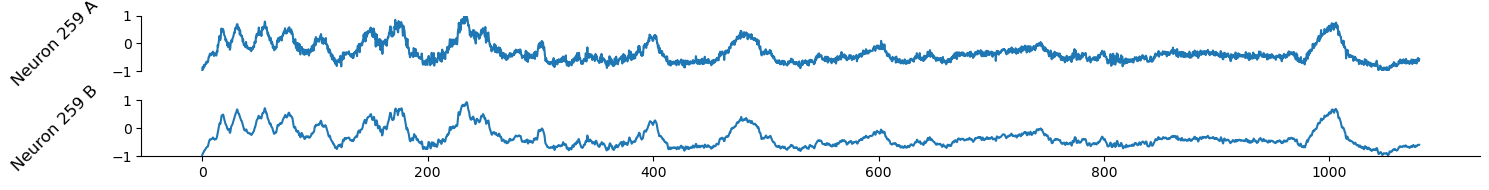

In [201]:
mvAvg = moving_average(oneWorm['calcium_data'], window_size=10)
compare_signals(oneWorm['calcium_data'], mvAvg, oneWorm['time_in_seconds'].squeeze(), 1)

# Gaussian noise?
---

In [216]:
rep = 100
noise_level = np.zeros((rep, 302)) # rep x neurons

for r in range(rep):
    gaussian_noise = np.random.normal(0, 1, oneWorm['calcium_data'].shape)
    noise_level[r,:] = cosine_similarity(oneWorm['calcium_data'], gaussian_noise)

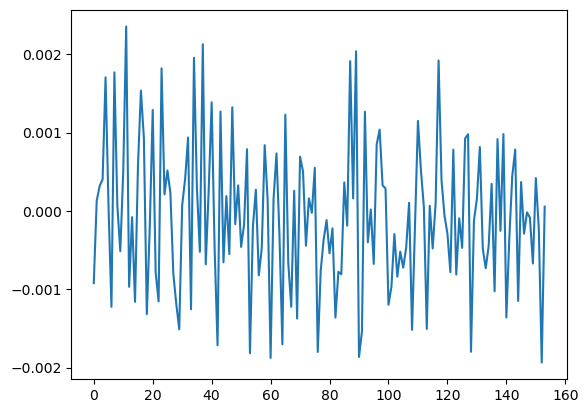

In [220]:
neuron_noise_level = np.mean(noise_level, axis=0)
active_neurons = np.where(neuron_noise_level != 0)[0]
plt.plot(neuron_noise_level[active_neurons])
plt.show()

# FFT
---

frequency_index: [ 0.          0.00092618  0.00185237 ... -0.00277855 -0.00185237
 -0.00092618]


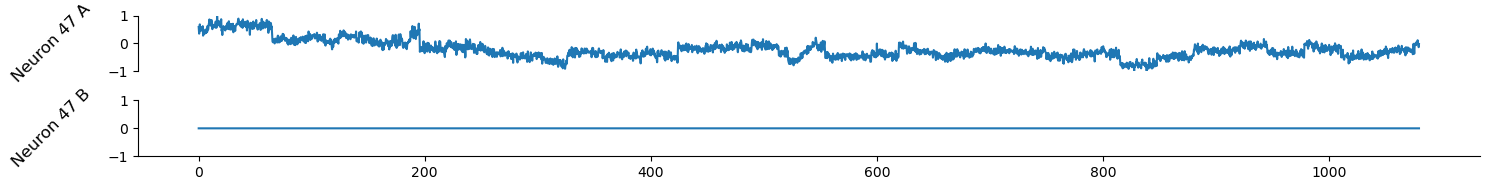

In [231]:
fft_signal, freq = frequency_domain_filter(oneWorm['calcium_data'], dt=oneWorm['dt'], cutoff_percentage=0.1)
compare_signals(oneWorm['calcium_data'], fft_signal, oneWorm['time_in_seconds'].squeeze(), 1)

In [232]:
oneWorm.keys()

dict_keys(['dataset', 'smooth_method', 'calcium_data', 'smooth_calcium_data', 'residual_calcium', 'smooth_residual_calcium', 'max_timesteps', 'time_in_seconds', 'dt', 'num_neurons', 'num_named_neurons', 'num_unknown_neurons', 'named_neurons_mask', 'unknown_neurons_mask', 'neurons_mask', 'slot_to_named_neuron', 'named_neuron_to_slot', 'slot_to_unknown_neuron', 'unknown_neuron_to_slot', 'slot_to_neuron', 'neuron_to_slot'])

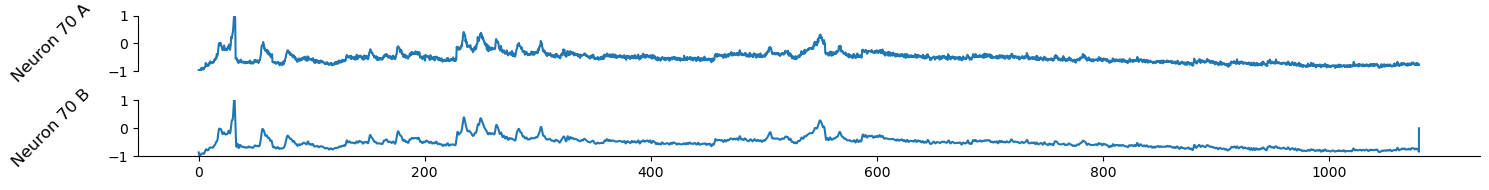

In [236]:
compare_signals(oneWorm['calcium_data'], oneWorm['smooth_calcium_data'], oneWorm['time_in_seconds'].squeeze(), 1)

In [230]:
freq.

(-4.999536908400481, 4.999536908400481)